In [2]:
import numpy as np
import matplotlib.pyplot as plt
from helpers.utils import reorder_points
import mistree as mist
import networkx as nx
import itertools
import time

In [3]:
# import a problematic unordered centreline

data = np.loadtxt("../../real_data/17_Hoelloch/process/centrelines/Riesengang_centreline3d.txt")

In [4]:
xyz = data[:, [2, 3, 4]]

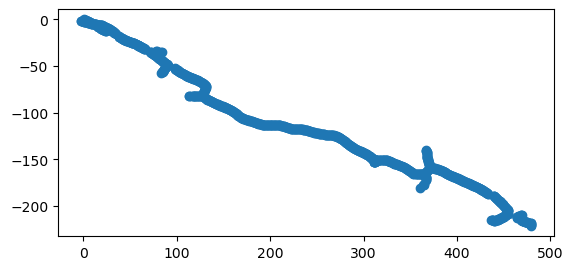

In [7]:
fig, ax = plt.subplots()

ax.scatter(xyz[:, 0], xyz[:, 1])
ax.set_aspect("equal")

In [8]:
mst = mist.GetMST(x=xyz[:, 0], y=xyz[:, 1], z = xyz[:, 2])
degree, edge_length, branch_length, branch_shape, edge_index, branch_index = mst.get_stats(include_index=True, k_neighbours= 10)
    
full_graph = nx.graph.Graph(edge_index.T.tolist())
    

In [24]:
subgraph = nx.graph.Graph(edge_index[:, branch_index[0]].T.tolist())

In [28]:
branch_node_indices = np.array([value for value in dict(subgraph.nodes)], dtype=int)




In [41]:
curv_pos = np.zeros(xyz[branch_node_indices].shape[0])

curv_pos[1:] = np.cumsum(np.linalg.norm(np.diff(xyz[branch_node_indices], axis = 0), axis = 1))

In [42]:
curv_pos

array([  0.        ,   0.54497983,   2.00427755,   2.65088836,
         3.36776909,   3.93497733,   4.83368   ,   5.5779286 ,
         6.10472609,   6.80857415,   7.5640232 ,   8.327716  ,
         8.91032411,   9.43712749,  10.01283722,  10.69379075,
        11.21929127,  12.11187232,  12.87977564,  13.61403912,
        14.27882109,  15.24833349,  15.78284285,  16.28790028,
        16.96243525,  17.90680466,  18.61956823,  19.18204165,
        19.98984375,  20.81743185,  21.42990077,  22.02177172,
        22.77075816,  23.40148695,  23.98024619,  24.95947845,
        25.69611724,  26.49109581,  27.00661453,  27.56462901,
        28.18964538,  28.95834522,  29.84794437,  30.41286912,
        31.07553343,  31.93988871,  32.55609319,  33.15563707,
        33.70287077,  34.48034786,  35.04779956,  35.67625446,
        36.22250923,  36.98449715,  37.56260634,  38.32058183,
        38.9819508 ,  39.54522715,  40.20614661,  40.72117437,
        41.51849425,  42.35437661,  43.31175025,  43.96

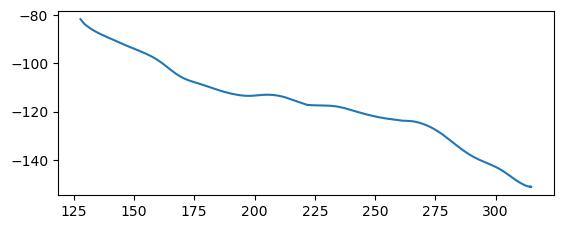

In [30]:
fig, ax = plt.subplots()

ax.plot(xyz[branch_node_indices, 0], xyz[branch_node_indices, 1])
ax.set_aspect("equal")

In [32]:
s = time.time()
xy_reordered_1 = reorder_points(xy, 10)
e = time.time()
print(f"time taken: {e-s:.3f}s")

time taken: 0.140s


In [33]:
def reorder_polygon_MST(a,is3d=False, verbose = False):
        """
        reorders the array of points from an unordered output of a mesh / plane intersection with a minimum spanning tree

        ----------
        
        arguments:

            points -> np.array: a numpy array with N target coordinates (N x 3 or N x 2 matrix)
            ind -> int : the index of the starting point
        ----------
        
        returns :

            ordered_points -> np.array : a numpy array containing the reordered data (N x 3 matrix)
        
        """
        
        

        if is3d == True:
            mst = mist.GetMST(x=a[:, 0], y=a[:, 1], z=a[:, 2])
        else:
            mst = mist.GetMST(x=a[:, 0], y=a[:, 1])
        _, _, _, _, edge_index, _ = mst.get_stats(include_index=True, k_neighbours= 10)
        
        full_graph = nx.graph.Graph(edge_index.T.tolist())
        
        # find the largest connected component. 
        cc0 = next(nx.connected_components(full_graph))
        cc0_graph = full_graph.subgraph(cc0)
        cc0_degrees = cc0_graph.degree() #Dict with Node ID, Degree
        # find all degree 1 nodes
        deg1 = [key for key,value in dict(cc0_degrees).items() if value == 1]

        # find all paths connecting pairs of degree 1 nodes
        all_pairs = list(itertools.combinations(deg1, 2))
        path_lengths = np.array([path_length_from_node_pair(graph=cc0_graph,node_pair=pair) for pair in all_pairs])
        
        # find the start and end nodes of the longest simple path between any two deg-1 nodes
        # this corresponds to the path 
        s, e = all_pairs[np.argmax(path_lengths)]
        path_nodes = next(nx.simple_paths.all_simple_paths(cc0_graph,s, e))
        reordered  = a[path_nodes]

        return reordered

def path_length_from_node_pair(graph: nx.graph.Graph, node_pair: Tuple )-> int:
    """A convenience function to return the length of the longest simple path between two nodes of a graph"""
    return len(next(nx.simple_paths.all_simple_paths(graph,*node_pair)))

In [34]:
s = time.time()
xy_reordered_2 = reorder_MST(xy)
e = time.time()
print(f"time taken: {e-s:.3f}s")

time taken: 0.041s


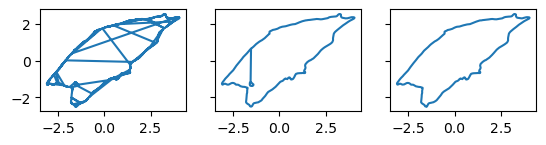

In [35]:

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, sharex = True, sharey=True)

ax1.plot(data[:, 0], data[: ,2])
ax2.plot(xy_reordered_1[:, 0], xy_reordered_1[: ,1])
ax3.plot(xy_reordered_2[:, 0], xy_reordered_2[: ,1])

    
for ax in ax1, ax2, ax3:
    ax.set_aspect("equal")